<a href="https://colab.research.google.com/github/NipunFernando/Machine-Learning/blob/main/Multi_Layer_Perceptron_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

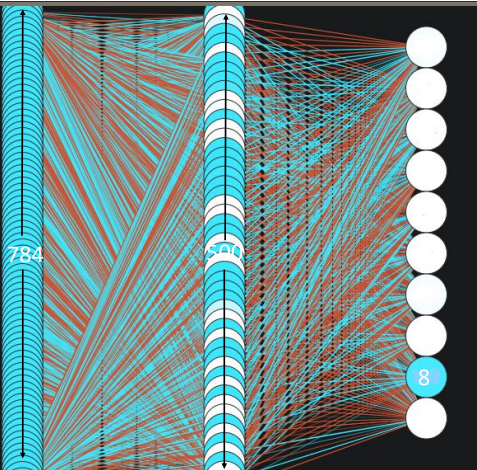

##Input : 784d Image
##Hidden Layer : 500d 
##Output : 10d (0-9)

###Assignment
Build a 2-layer MLP for MNIST digit classfication. Feel free to play around with the model architecture and see how the training time/performance changes, but to begin, try the following:

Image (784 dimensions) ->
fully connected layer (500 hidden units) -> nonlinearity (ReLU) ->
fully connected (10 hidden units) -> softmax

Try building the model both with basic PyTorch operations, and then again with more object-oriented higher-level APIs. You should get similar results!

In [37]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm


# Getting MNIST Dataset
from torchvision import datasets, transforms

# Getting two separate data sets to Train and Test
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

# Printing to check
print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))



Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


In [38]:
# Checking for shape
image, label = mnist_train[0]
print("image shape = ",image.shape)
print("label = ",label)

# Reshaping
image = image.reshape(28,28)
print("Reshaped image shape = ",image.shape)

image shape =  torch.Size([1, 28, 28])
label =  5
Reshaped image shape =  torch.Size([28, 28])


In [39]:
# Using a dataloader to shuffle and batch
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size = 100, shuffle=False)



# Checking a mini batch shape
data_train_iter = iter(train_loader)
images, labels = next(data_train_iter)
print("min batch images shape = ",images.size())
print("mini batch no. of labels = ", labels.size())

# Flattenning
x = images.view(-1,28*28)
print('shape of x =',x.size())  # This input 'x' contains a mini batch of 100 images flattened to a size of 784


min batch images shape =  torch.Size([100, 1, 28, 28])
mini batch no. of labels =  torch.Size([100])
shape of x = torch.Size([100, 784])


Input is 784d tensor which includes the 28x28 pixel values of a single image. <br>
For the hidden layer of 500d, need to convert the 784d to a 500d tensor via a linear regression function (transformation) <br>

multiply each pixel $x_i$ of the input row vector by a weight $w_{i,1}$, sum them all together, and then add a bias $b_1$.
This is equivalent to a dot product between the class "1" weights and the input:

\begin{align}
y_1 = \sum_i x_i w_{i,1} + b_1
\end{align}

The magnitude of this result $y_1$, we'll take as being correlated to our belief in how likely we think the input digit was a 1. 
The higher the value of $y_1$, the more likely we think the input image $x$ was a 1 (i.e., we'd hope we'd get a relatively large value for $y_1$ for the above image). 
Remember though, our original goal was to identify all 10 digits, so we actually have:

\begin{align*}
y_1 =& \sum_i x_i w_{i,1} + b_1 \\
y_2 =& \sum_i x_i w_{i,2} + b_2 \\
y_3 =& \sum_i x_i w_{i,3} + b_3 \\
y_4 =& \sum_i x_i w_{i,4} + b_4 \\
y_5 =& \sum_i x_i w_{i,5} + b_5 \\
y_6 =& \sum_i x_i w_{i,6} + b_6 \\
y_7 =& \sum_i x_i w_{i,7} + b_7 \\
y_8 =& \sum_i x_i w_{i,8} + b_8 \\
.\\
.\\
.\\
y_ 499 =& \sum_i x_i w_{i,499} + b_499\\
y_500 =& \sum_i x_i w_{i,500} + b_500\\
\end{align*}

We can express this in matrix form as:

\begin{align}
y = x W + b 
\end{align}

To take advantage of parallel computation, we commonly process multiple inputs $x$ at once, in a minibatch.
We can stack each input $x$ into a matrix $X$, giving us 

\begin{align}
Y = X W + b 
\end{align}

Visualizing the dimensions:
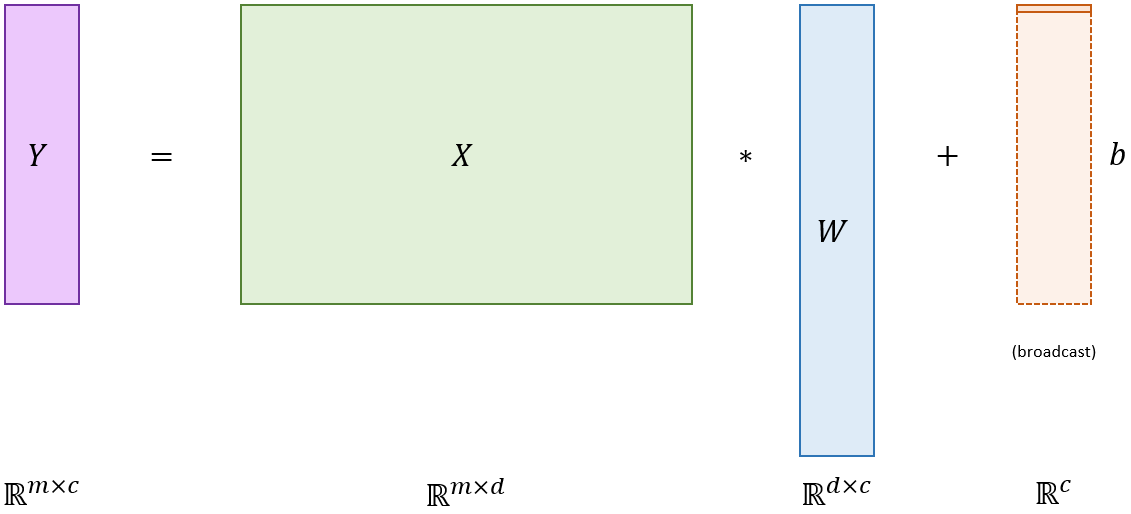



m (mini batch size)  = 100 <br>
c                    = 500<br>
d                    = 784 <br>

### PARAMETERS OF THE  MODEL: W(784X500) and b(500)
Need to learn w's and b's....

In [40]:
# To start ...
# Randomly initializing weights

W = torch.randn(784,500)/np.sqrt(784)
W.requires_grad_() # To tell pytorch's autograd to track gradient of W, b and all that depend.

# Just initializing b as zeroes...
b = torch.zeros(500,requires_grad=True)

In [41]:
 # Let's compute Y
 y = torch.matmul(x,W) + b
 print(y.size())
 print(y)

torch.Size([100, 500])
tensor([[ 0.4350,  0.5351,  0.0271,  ..., -0.2131,  0.2045, -0.3749],
        [ 0.9588,  0.2324, -0.2676,  ..., -0.7183,  0.1239, -0.1329],
        [ 0.6046, -0.2084,  0.0348,  ...,  0.6826,  0.0717,  0.0863],
        ...,
        [ 0.9852, -0.0351,  0.0156,  ...,  0.4164, -0.2604, -0.3556],
        [ 0.1855, -0.0148,  0.1325,  ..., -0.0407,  0.0832,  0.0559],
        [ 1.0734,  0.0724,  0.1231,  ...,  0.3987, -0.0199, -0.2480]],
       grad_fn=<AddBackward0>)


### Non-linearity
Using ReLU : 
\begin{align}
x = \max(0,x)
\end{align}

In [42]:
# Using torch's ReLU 
y_relu = torch.nn.functional.relu(y)
print(y_relu)

tensor([[0.4350, 0.5351, 0.0271,  ..., 0.0000, 0.2045, 0.0000],
        [0.9588, 0.2324, 0.0000,  ..., 0.0000, 0.1239, 0.0000],
        [0.6046, 0.0000, 0.0348,  ..., 0.6826, 0.0717, 0.0863],
        ...,
        [0.9852, 0.0000, 0.0156,  ..., 0.4164, 0.0000, 0.0000],
        [0.1855, 0.0000, 0.1325,  ..., 0.0000, 0.0832, 0.0559],
        [1.0734, 0.0724, 0.1231,  ..., 0.3987, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)


Next, for the output layer, doing the above procedure with input as y_relu (500d) and output z(10d). <br>


\begin{align}
z = y\_relu .M + d 
\end{align}

y_relu   =   100x500 <br>
M        =   500x10 <br>
d        =   10 <br>
z        =   100x10 <br>

In [43]:
# Random initialization of M, d
M = torch.randn(500,10)/np.sqrt(500)
M.requires_grad_() # To tell pytorch's autograd to track gradient of W, b and all that depend.

# Just initializing b as zeroes...
d = torch.zeros(10,requires_grad=True)

# Computing z
z = torch.matmul(y_relu,M) + d

print(z.size())
print(z[0,:]) # same as print(z[0])

torch.Size([100, 10])
tensor([ 0.0898, -0.1762, -0.3145,  0.5378, -0.0326,  0.2841, -0.0314,  0.0768,
         0.0978,  0.2071], grad_fn=<SliceBackward0>)


### Softmax
\begin{align}
p(y_i) = \text{softmax}(y_i) = \frac{\text{exp}(y_i)}{\sum_j\text{exp}(y_j)}
\end{align}
To get the 10d values to a range from 0-1.

In [44]:
z_probability = torch.nn.functional.softmax(z,dim=1)
print(z_probability[0])

tensor([0.0990, 0.0759, 0.0661, 0.1549, 0.0876, 0.1202, 0.0877, 0.0977, 0.0998,
        0.1113], grad_fn=<SelectBackward0>)


### Cross-entropy loss



In [45]:
cross_entropy = torch.nn.functional.cross_entropy(z,labels)
print(cross_entropy)
# or
print("cross entropy with torch.nn.functional.cross_entropy: {}".format(cross_entropy))

tensor(2.3055, grad_fn=<NllLossBackward0>)
cross entropy with torch.nn.functional.cross_entropy: 2.3054850101470947


### Backward pass
Using backpropagation, need to adjust W,b and M,d to reduce cross-entropy loss.

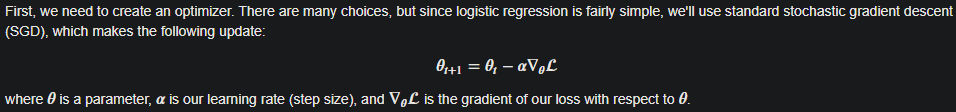



In [46]:
# Creating optimizer for W,b with learning rate 0.1
optimizer1 = torch.optim.SGD([W,b], lr=0.1)

# Creating optimizer for M,d with learning rate 0.1
optimizer2 = torch.optim.SGD([M,d], lr=0.1)


# Computing gradients of W,b,M,d using backward()
cross_entropy.backward()

# print(b.grad) # Long
print(d.grad)


# Calling the optimizers to do the 𝜃𝑡+1=𝜃𝑡−𝛼∇𝜃 update (SGD)

print('d (before) = ',d)
optimizer1.step()
optimizer2.step()
print('d (after) = ',d)

# Clearing gradient buffers
optimizer1.zero_grad()
optimizer2.zero_grad()

tensor([-0.0165, -0.0530, -0.0164,  0.0035, -0.0007, -0.0230, -0.0110,  0.0376,
         0.0193,  0.0601])
d (before) =  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
d (after) =  tensor([ 1.6485e-03,  5.3004e-03,  1.6446e-03, -3.5452e-04,  6.6158e-05,
         2.2993e-03,  1.0983e-03, -3.7606e-03, -1.9290e-03, -6.0130e-03],
       requires_grad=True)


### Model Training
To train the model, we just need repeat what we just did for more minibatches from the training set.
As a recap, the steps were:
1. Draw a minibatch
2. Zero the gradients in the buffers for `W` and `b`, `M` and `d`.
3. Perform the forward pass (compute prediction, calculate loss)
4. Perform the backward pass (compute gradients, perform SGD step)

Going through the entire dataset once is referred to as an epoch.
In many cases, we train neural networks for multiple epochs, but here, a single epoch is enough.
We also wrap the train_loader with `tqdm`.
This isn't neccessary, but it adds a handy progress bar so we can track our training progress.

In [50]:
# Looping for all mini-batches
for images,labels in tqdm(train_loader):
  # Zero out gradients
  optimizer1.zero_grad()
  optimizer2.zero_grad()

  # Forward pass
  x = images.view(-1,28*28)
  y = torch.matmul(x,W) + b
  z = torch.matmul(y,M) + d
  cross_entropy = torch.nn.functional.cross_entropy(z,labels)

  # Backward pass
  cross_entropy.backward()
  optimizer1.step()
  optimizer2.step()
  




  0%|          | 0/600 [00:00<?, ?it/s]

### Testing


In [48]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
  # Looping for mini batches of test set
  for images, labels in tqdm(test_loader):
      # Forward pass
      x  = images.view(-1, 28*28)
      y = torch.matmul(x,W) + b
      z = torch.matmul(y,M) + d
      
      # Predicting
      predictions = torch.argmax(z,dim=1)
      correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9115999937057495
